# 10_Simple-MLP-unsupervised-SBATCH.ipynb

Run several experiments and plot results

- Full MNIST dataset
- Number of epochs
- Tanh vs linear/margins embedding contrastive loss

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import MLPUnsupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [4]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


In [5]:
total_size = (28*28 * 16) + (16 * 10)
total_size

12704

# No pruning

## Quick test

```bash
$ sbatch sbatch_scripts/10_no-prune_linear_fast.sh
Submitted batch job 56576379
```

Debugging. Not reproducing the training in notebook 08.
```bash
sbatch sbatch_scripts/10_no-prune_linear_fast.sh 
Submitted batch job 56692125
```

Making starting density 1.0. Initalization bug may have made the results in 08 look better since the starting density was inflated?
```bash
sbatch sbatch_scripts/10_no-prune_linear_fast.sh 
Submitted batch job 56694772
```

Updated model state saving
```bash
sbatch sbatch_scripts/10_no-prune_linear_fast.sh 
Submitted batch job 56888120
```

Decreased learning rate
```bash
sbatch sbatch_scripts/10_no-prune_linear_fast.sh 
Submitted batch job 56891118
```

In [10]:
no_prune_linear_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_linear_fast/sbatch-56891118_bs-32_sf-0.05_sl-49_vr-6_id-1.0_nti-50_lmd-2_pat-linear_m-5.0_ugpp-False_lr-0.0005_s-4")


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_linear_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

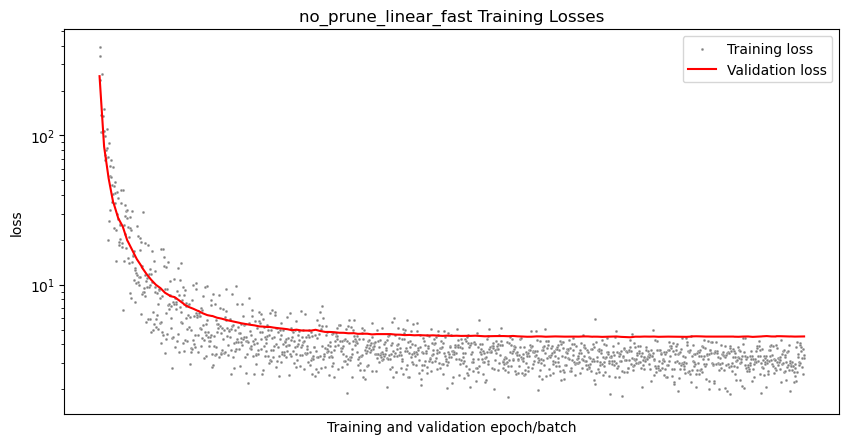

In [11]:
no_prune_linear_fast_result.plot_training_losses()

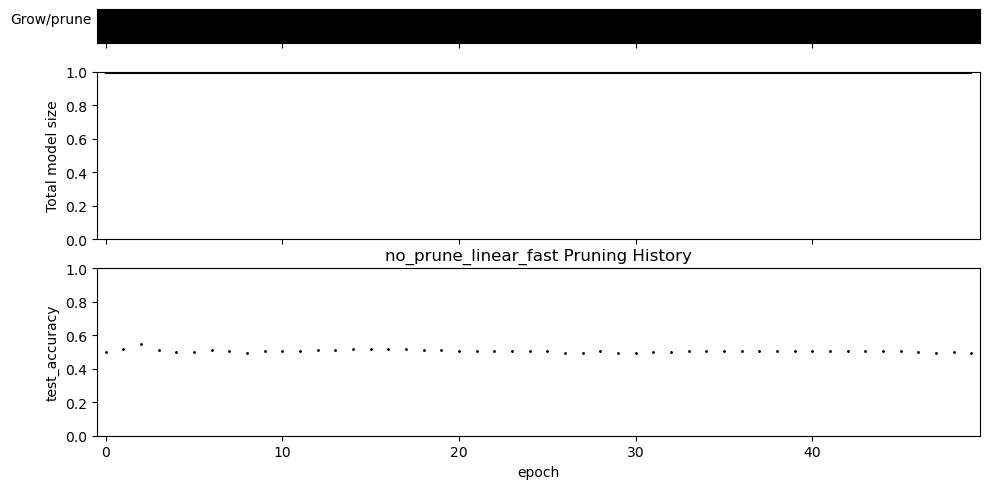

In [13]:
fig, ax = no_prune_linear_fast_result.plot_pruning(figsize=(10, 5), norm_size=total_size, test_err_col='test_accuracy')

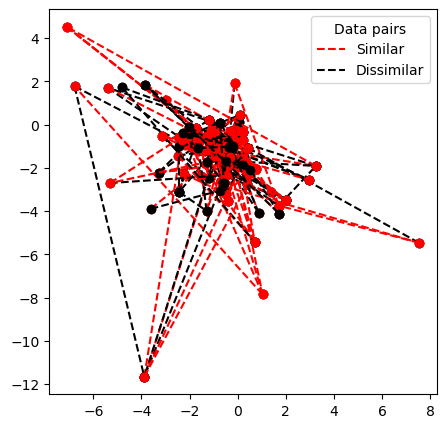

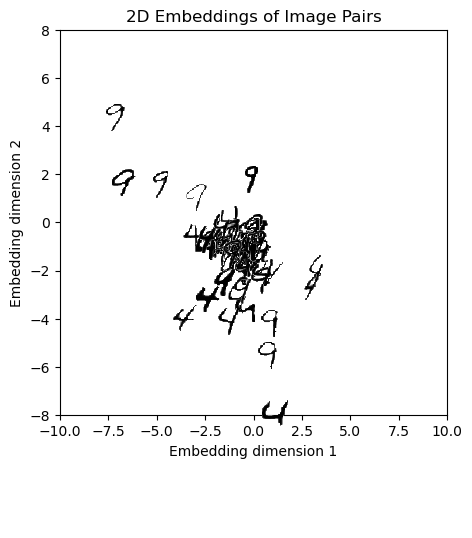

In [14]:
no_prune_linear_fast_result.set_trained_model(49)
no_prune_linear_fast_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_linear_fast_result.plot_image_embeddings(test_pair_dataloader, xlim=(-10, 10), ylim=(-8, 8))
plt.show()

```bash
$ sbatch sbatch_scripts/10_no-prune_tanh_fast.sh
Submitted batch job 56576380
```

Decreased learning rate
```bash
Submitted batch job 56577464
```

Set init density to 1.0
```bash
sbatch sbatch_scripts/10_no-prune_tanh_fast.sh 
Submitted batch job 56698186
```

Update model state saving
```bash
sbatch sbatch_scripts/10_no-prune_tanh_fast.sh 
Submitted batch job 56893693
```

In [25]:
no_prune_tanh_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_tanh_fast/sbatch-56893693_bs-32_sf-0.05_sl-49_vr-6_id-1.0_nti-100_lmd-2_pat-Tanh_m-0.5_ugpp-False_lr-0.0001_s-4")


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_tanh_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

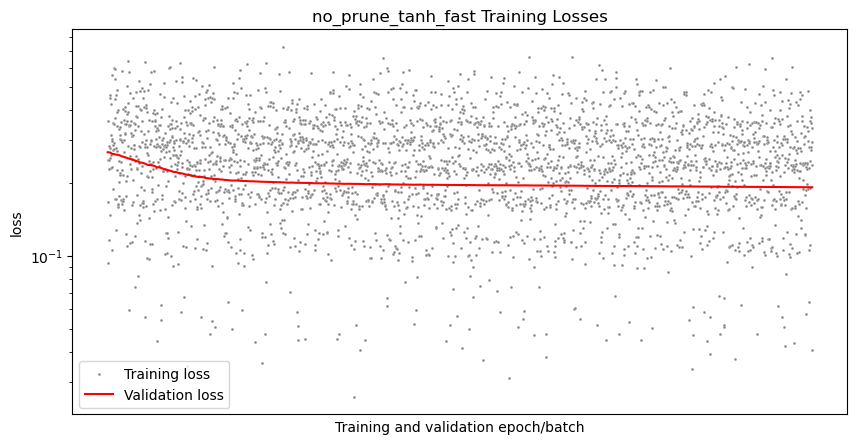

In [26]:
no_prune_tanh_fast_result.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Grow/prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_tanh_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

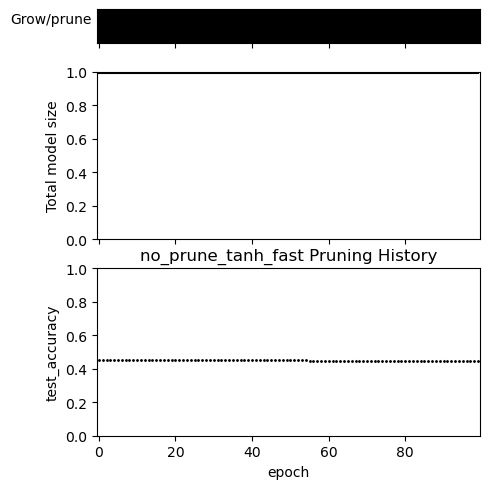

In [28]:
no_prune_tanh_fast_result.plot_pruning(norm_size=total_size, test_err_col='test_accuracy')

Tanh()


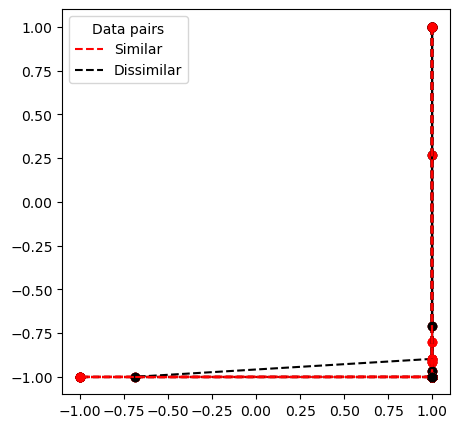

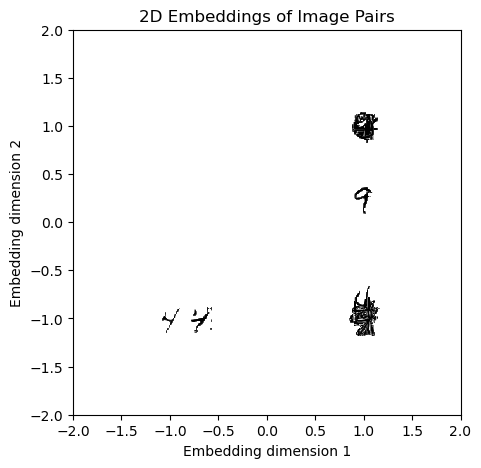

In [29]:
no_prune_tanh_fast_result.set_trained_model(99)
no_prune_tanh_fast_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_tanh_fast_result.plot_image_embeddings(test_pair_dataloader, xlim=(-2,2), ylim=(-2, 2))
plt.show()

## Full jobs

More epochs, 10% of MNIST
```bash
$ sbatch sbatch_scripts/10_no-prune_linear_full.sh
Submitted batch job 56579080
$ sbatch sbatch_scripts/10_no-prune_tanh_full.sh
Submitted batch job 56579094
```

Decreased learning rate and set init density to 100%
```bash
sbatch sbatch_scripts/10_no-prune_linear_full.sh 
Submitted batch job 56698123
sbatch sbatch_scripts/10_no-prune_tanh_full.sh 
Submitted batch job 56699853
```

Increased training epochs=1000
```bash
sbatch sbatch_scripts/10_no-prune_linear_full.sh 
Submitted batch job 56701540
```

Increased learning rate, fixed model state saving
```bash
sbatch sbatch_scripts/10_no-prune_linear_full.sh 
Submitted batch job 56888853
```

In [69]:
no_prune_linear_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_linear_full/sbatch-56701540_bs-32_sf-0.1_sl-49_vr-6_id-1.0_nti-1000_lmd-2_pat-linear_m-5.0_ugpp-False_lr-0.0001_s-4")
no_prune_tanh_full_result= MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_tanh_full/sbatch-56699853_bs-32_sf-0.1_sl-49_vr-6_id-1.0_nti-500_lmd-2_pat-Tanh_m-0.5_ugpp-False_lr-0.0001_s-4")


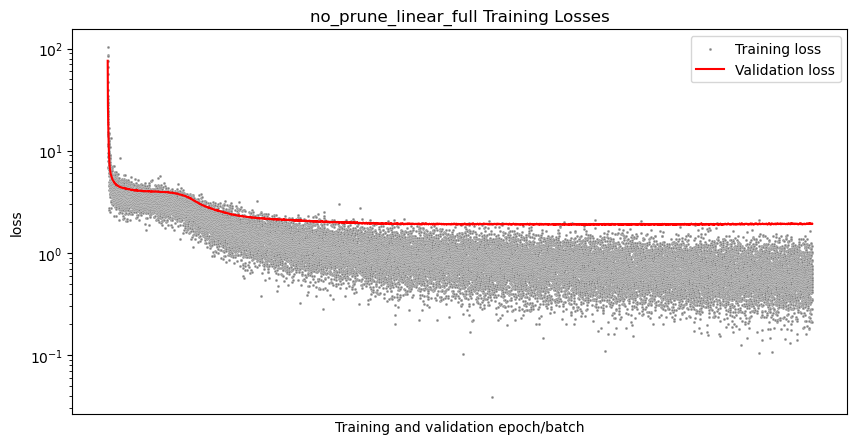

In [8]:
no_prune_linear_full_result.plot_training_losses()
plt.show()

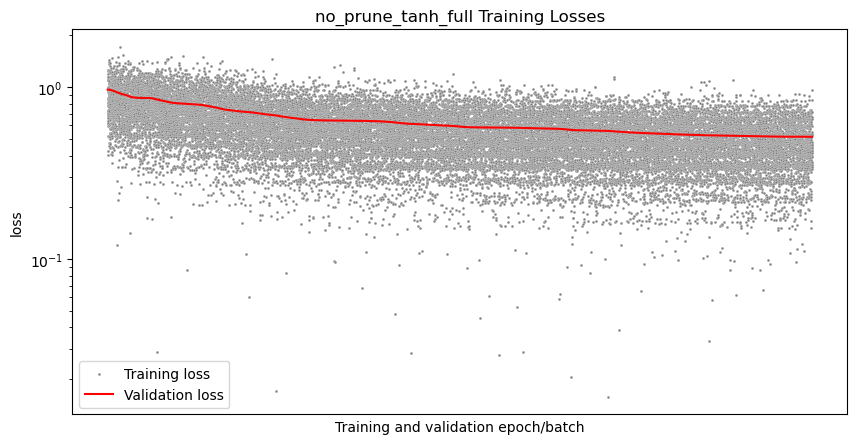

In [38]:
no_prune_tanh_full_result.plot_training_losses()
plt.show()

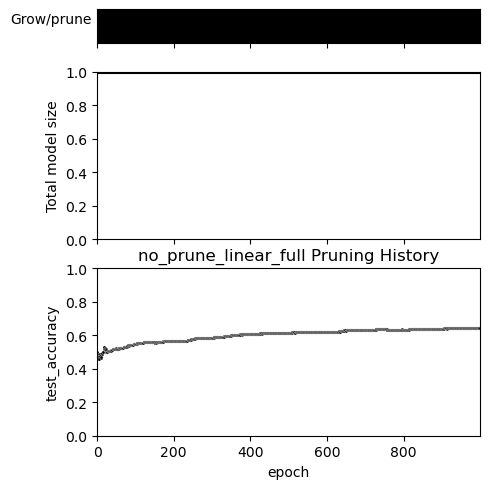

In [70]:
no_prune_linear_full_result.plot_pruning(norm_size=total_size, test_err_col='test_accuracy')
plt.show()

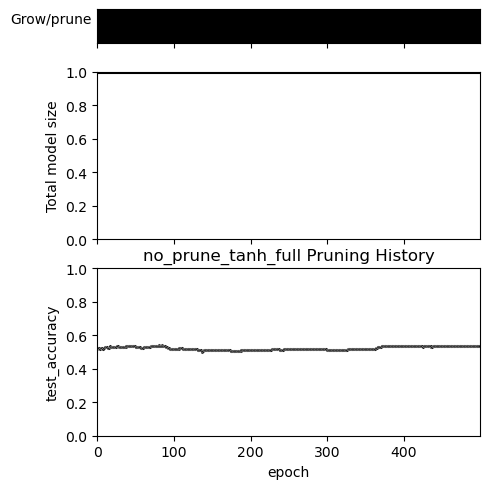

In [40]:
no_prune_tanh_full_result.plot_pruning(norm_size=total_size, test_err_col='test_accuracy')
plt.show()

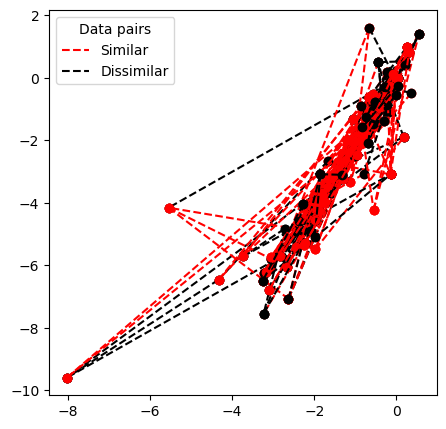

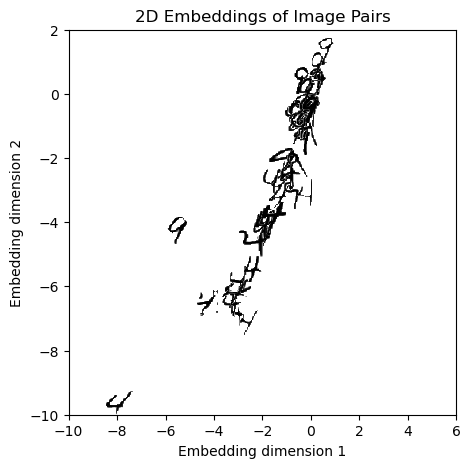

In [72]:
no_prune_linear_full_result.set_trained_model(999)
no_prune_linear_full_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_linear_full_result.plot_image_embeddings(test_pair_dataloader, num_pairs_per_batch=2, ylim=(-10, 2), xlim=(-10, 6))
plt.show()

In [68]:
no_prune_linear_full_result.model_state_dicts[0]['layers.1.W']

tensor([[-0.1342, -0.0463],
        [ 0.0747, -0.0055],
        [-0.5276, -0.2071],
        [-0.2309,  0.9240],
        [-0.1040, -0.1547],
        [ 1.5450,  1.3777],
        [-0.0686, -1.4318],
        [ 0.0899,  0.0628],
        [ 0.0816,  0.1199],
        [ 0.7375, -0.6298],
        [-1.0947,  0.0091],
        [ 0.3868, -0.1159],
        [-1.2778, -0.5544],
        [-0.1382, -0.0644],
        [ 1.3735, -1.2814],
        [-0.0875, -0.1367]])

In [67]:
no_prune_linear_full_result.model_state_dicts[10]['layers.1.W']

tensor([[-0.1342, -0.0463],
        [ 0.0747, -0.0055],
        [-0.5276, -0.2071],
        [-0.2309,  0.9240],
        [-0.1040, -0.1547],
        [ 1.5450,  1.3777],
        [-0.0686, -1.4318],
        [ 0.0899,  0.0628],
        [ 0.0816,  0.1199],
        [ 0.7375, -0.6298],
        [-1.0947,  0.0091],
        [ 0.3868, -0.1159],
        [-1.2778, -0.5544],
        [-0.1382, -0.0644],
        [ 1.3735, -1.2814],
        [-0.0875, -0.1367]])

**TODO**: Determine why the model states are only storing the final model state (presumably)

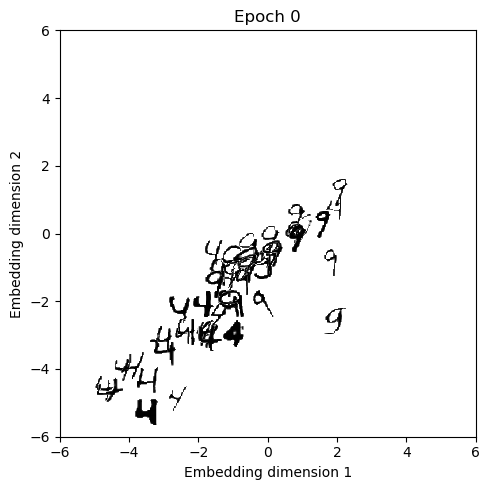

In [57]:
for i in range(0, 501, 50):
    no_prune_linear_full_result.set_trained_model(i)
    fig, ax = no_prune_linear_full_result.plot_image_embeddings(test_pair_dataloader, num_pairs_per_batch=2, xlim=(-6, 6), ylim=(-6, 6), figsize=(5, 5))
    plt.title(f"Epoch {i}")
    plt.tight_layout()
    plt.show()
    break

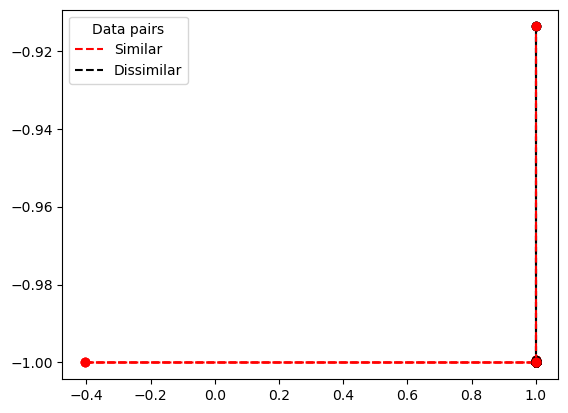

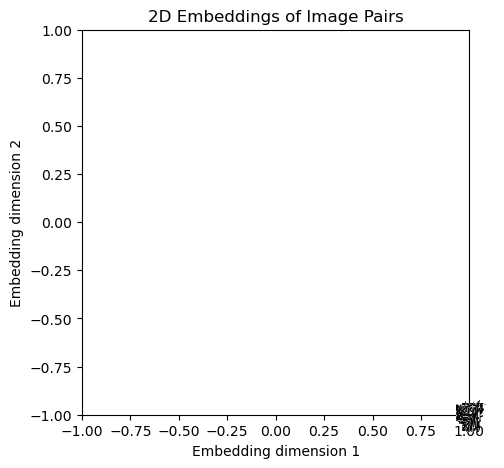

In [37]:
no_prune_tanh_full_result.set_trained_model(99)
no_prune_tanh_full_result.plot_pairs(test_pair_dataloader)
plt.show()
fig, ax = no_prune_tanh_full_result.plot_image_embeddings(test_pair_dataloader)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.show()

# With pruning

## Quick test

```bash
$ sbatch sbatch_scripts/10_prune_linear_fast.sh
Submitted batch job 56578343
$ sbatch sbatch_scripts/10_prune_tanh_fast.sh # Decreased learning rate for tanh
Submitted batch job 56578344
```

In [38]:
prune_linear_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_linear_fast/sbatch-56578343_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-linear_m-5.0_ugpp-True_lr-0.001_s-4")
prune_tanh_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_tanh_fast/sbatch-56578344_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-Tanh_m-0.2_ugpp-True_lr-0.0001_s-4")

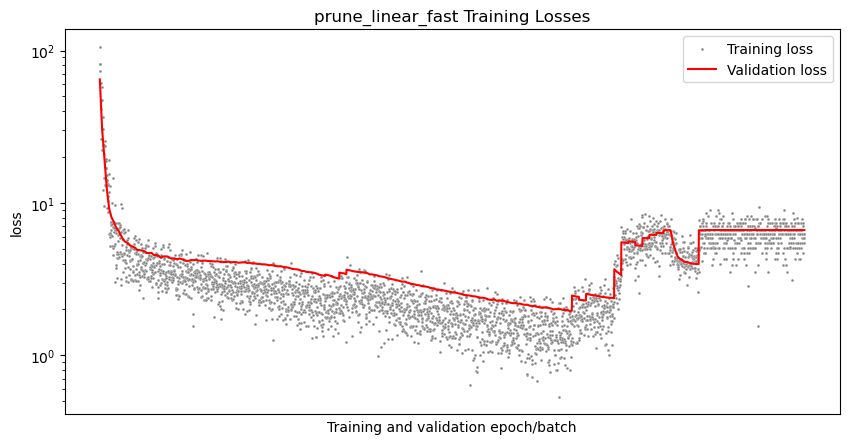

In [39]:
prune_linear_fast_result.plot_training_losses()
plt.show()

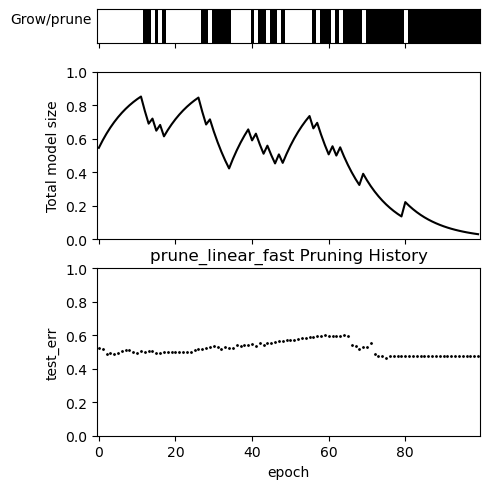

In [40]:
prune_linear_fast_result.plot_pruning(norm_size=total_size)
plt.show()

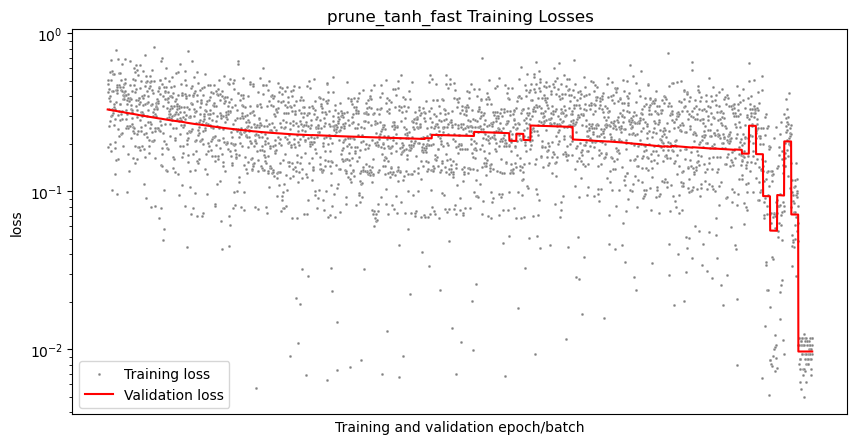

In [41]:
prune_tanh_fast_result.plot_training_losses()
plt.show()

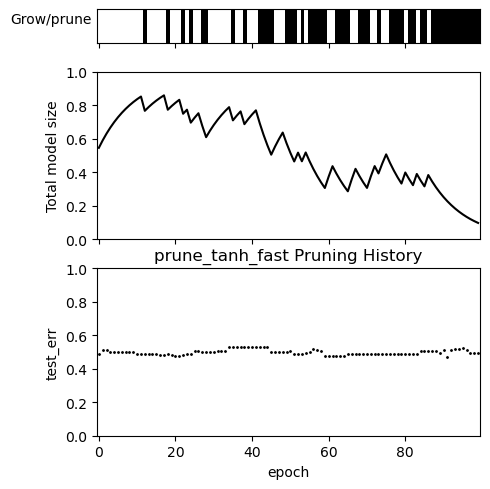

In [42]:
prune_tanh_fast_result.plot_pruning(norm_size=total_size)
plt.show()

## Full jobs

500 epochs, 10% of MNIST

```bash
$ sbatch sbatch_scripts/10_prune_linear_full.sh 
Submitted batch job 56579168
$ sbatch sbatch_scripts/10_prune_tanh_full.sh 
Submitted batch job 56579173
```

In [62]:
prune_linear_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_linear_full/sbatch-56579168_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-linear_m-5.0_ugpp-True_lr-0.001_s-4")
prune_tanh_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_tanh_full/sbatch-56579173_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-Tanh_m-0.2_ugpp-True_lr-0.0001_s-4")

In [63]:
prune_linear_full_result.params['pat']

'linear'

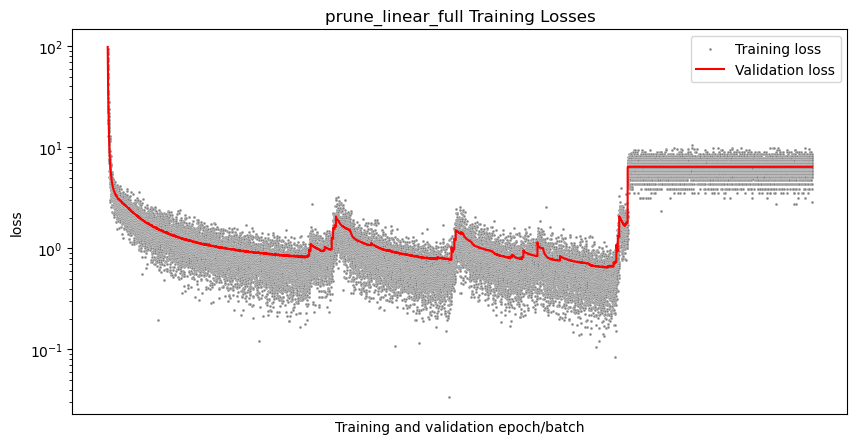

In [47]:
prune_linear_full_result.plot_training_losses()
plt.show()

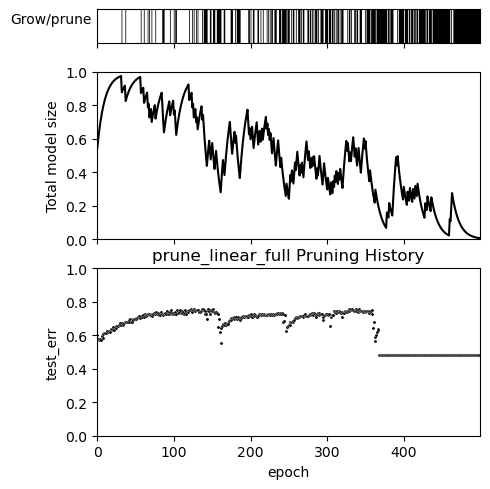

In [48]:
prune_linear_full_result.plot_pruning(norm_size=total_size)
plt.show()

In [64]:
prune_linear_full_result.set_trained_model(0)
prune_linear_full_result.model

<function MLPUnsupervisedTrainingResults.set_trained_model.<locals>.<lambda> at 0x7f0677746560>


DrLIMPruneGrowNetwork(
  (layers): ModuleList(
    (0): BaseDenseLayer(
      (act): ReLU()
    )
    (1): BaseDenseLayer()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

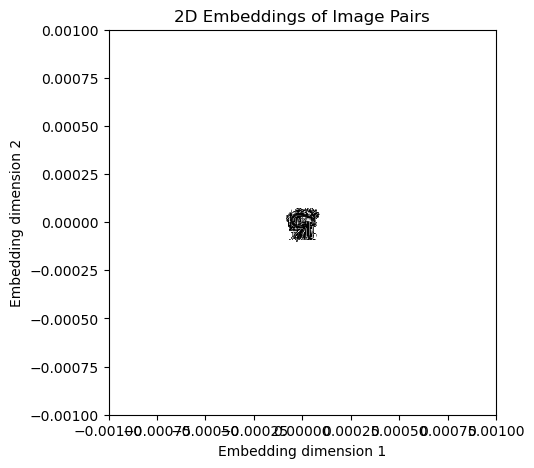

In [59]:
prune_linear_full_result.set_trained_model(0)
# fig, ax = prune_linear_full_result.plot_pairs(test_pair_dataloader)
# plt.ylim(-0.0001, 0.0001)
# plt.xlim(-0.0001, 0.0001)
# plt.show()
fig, ax = prune_linear_full_result.plot_image_embeddings(train_pair_dataloader, xlim=(-0.001, 0.001), ylim=(-0.001, 0.001))
plt.show()

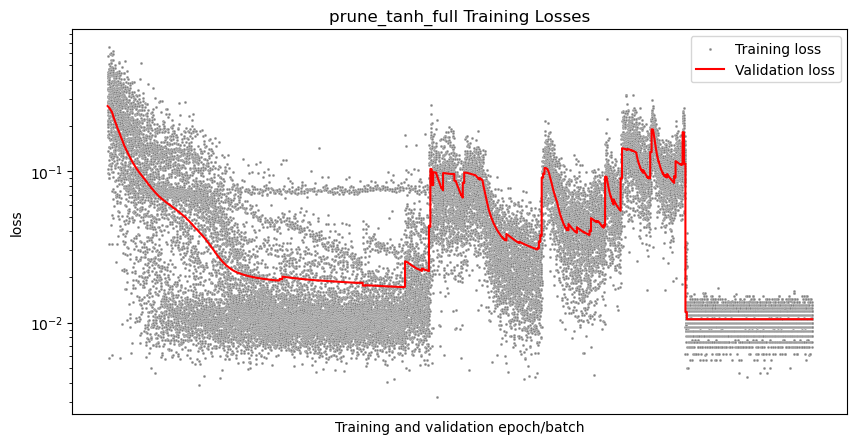

In [49]:
prune_tanh_full_result.plot_training_losses()
plt.show()

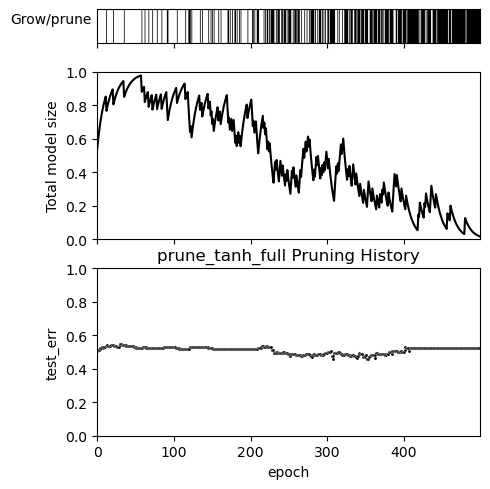

In [50]:
prune_tanh_full_result.plot_pruning(norm_size=total_size)
plt.show()